In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline
plt.style.use('bmh')

In [278]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [258]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [259]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [260]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [261]:
df_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1023,1024,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,14.0,Gd,TA,PConc,Gd,Gd,No,GLQ,16,Unf,0,1330,1346,GasA,Ex,Y,SBrkr,1504,0,0,1504,0,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,437,TA,TA,Y,156,20,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,191000
290,291,60,RL,120.0,15611,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1079,1079,GasA,Ex,Y,SBrkr,1079,840,0,1919,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2006.0,RFn,2,685,Gd,TA,Y,0,51,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,233230
1337,1338,30,RM,153.0,4118,Pave,Grvl,IR1,Bnk,AllPub,Corner,Mod,OldTown,Feedr,Norm,1Fam,1Story,4,4,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,693,693,Grav,Fa,N,FuseA,693,0,0,693,0,0,1,0,2,1,Fa,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,20,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal,52500
1422,1423,120,RM,37.0,4435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,170.0,Gd,TA,PConc,Gd,TA,Av,GLQ,686,Unf,0,162,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,0,NaN,Attchd,2003.0,Fin,2,420,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,136500
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
70,71,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,1973,1973,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880,Unf,0,343,2223,GasA,Ex,Y,SBrkr,2223,0,0,2223,1,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1973.0,Fin,2,516,TA,TA,Y,300,0,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,Inside,Mod,StoneBr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,Stone,16.0,Gd,TA,PConc,Ex,TA,Av,ALQ,1274,Unf,0,256,1530,GasA,Ex,Y,SBrkr,1530,0,0,1530,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,430,TA,TA,Y,168,36,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000
492,493,60,RL,105.0,15578,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,728,728,GasA,Gd,Y,SBrkr,728,728,0,1456,0,0,2,1,3,1,TA,8,Typ,0,NaN,Attchd,2006.0,RFn,2,429,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,New,Partial,172785
861,862,190,RL,75.0,11625,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,2fmCon,1Story,5,4,1965,1965,Hip,CompShg,Plywood,HdBoard,None,0.0,TA,TA,PConc,TA,TA,Mn,BLQ,841,Unf,0,198,1039,GasA,Ex,Y,SBrkr,1039,0,0,1039,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Unf,2,504,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,131500
1002,1003,20,RL,75.0,11957,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,RRAn,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,53.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf

In [262]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [263]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [264]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [265]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


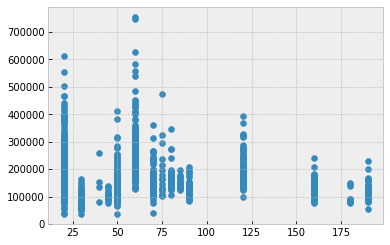

In [266]:
fig, axes = plt.subplots()
axes.scatter(x = df_train.MSSubClass, y = df_train.SalePrice)

In [267]:
def get_relation(df, target):
    df = df.drop(target, axis=1)
    all_cols = df.columns.values
    target = [target]
    m = 4
    n = len(df.columns) // m
    fig, ax = plt.subplots(n, m)
    i = 0
    j = 0
    import pdb; pdb.set_trace();
    for key in df_train:
        ax[i, j].scatter(df_train[key].fillna(df_train[key].median()), target)
        j += 1
        if j == 3:
            j = 0
            i += 1
    

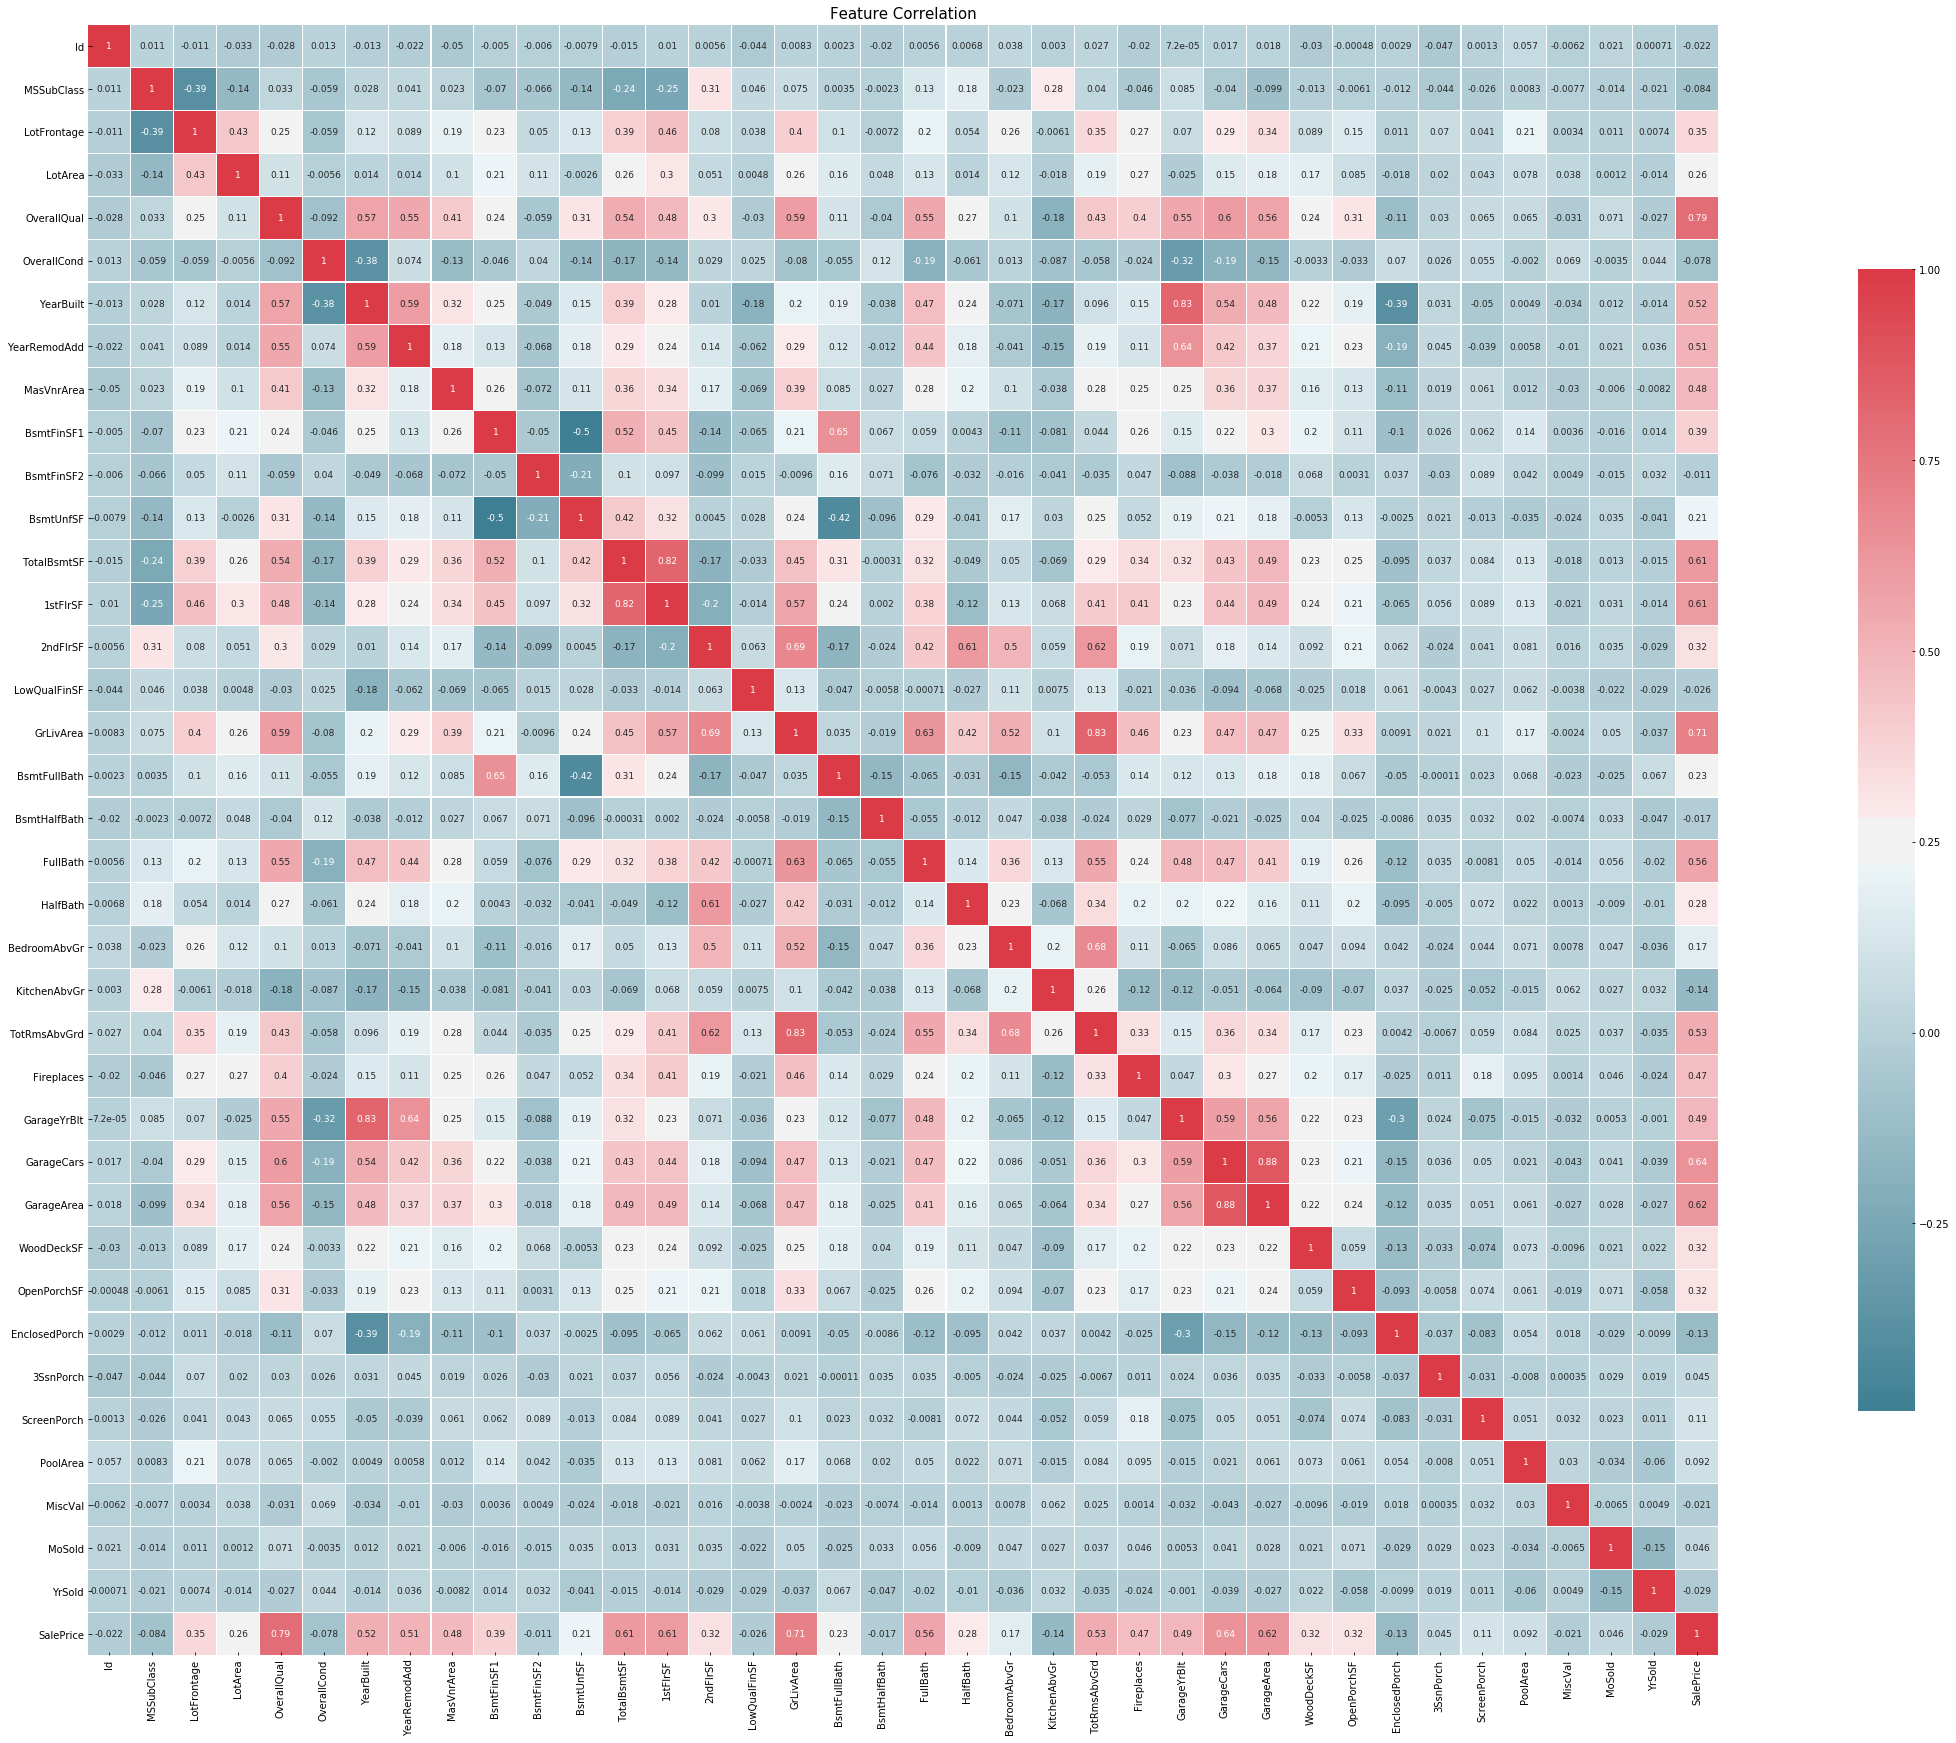

In [268]:
def correlation_heatmap(df):
    fig, axes = plt.subplots(figsize=(50, 30))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    
    sns.heatmap(
        df.corr(),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink': 0.7},
        ax=axes,
        annot=True,
        linewidths=0.1, vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 9}
    )
    axes.set_title('Feature Correlation', y=1.05, size=15)

correlation_heatmap(df_train)

/Users/lality/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


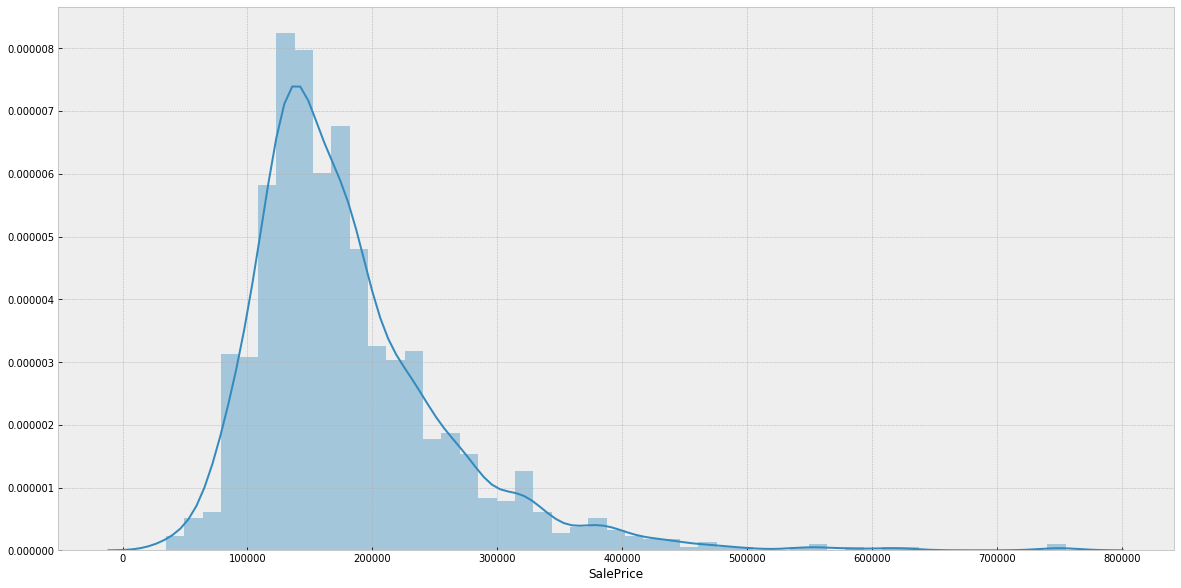

In [29]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.distplot(df_train.SalePrice, ax=axes)

/Users/lality/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


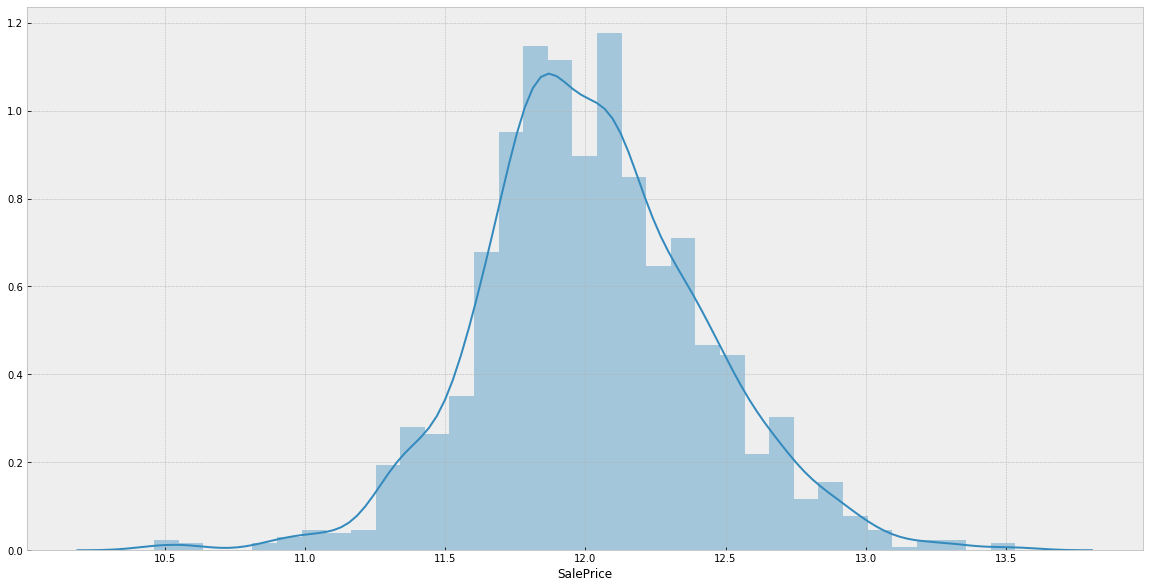

In [269]:
df_train.SalePrice = np.log1p(df_train.SalePrice )
fig, axes = plt.subplots(figsize=(20, 10))
sns.distplot(df_train.SalePrice, ax=axes)

In [270]:
y = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test), axis=0, sort=False).reset_index(drop=True)

In [271]:
y.shape

(1460,)

In [272]:
all_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [283]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

def process_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None, 
               preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    if not ignore_flds:
        ignore_flds = []
    if not skip_flds:
        skip_flds = []
    if subset:
        df = get_sample(df, subset)
    else:
        df = df.copy()
    ignore_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn:
        preproc_fn(df)
    if y_fld is None:
        y = None
    else:
        if not is_numeric_dtype(df[y_fld]):
            df[y_fld] = df[y_fld].cat.codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)
    
    if na_dict is None:
        na_dict = {}
    else:
        na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n, c in df.items():
        na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], 
               axis = 1, inplace=True)
    if do_scale:
        mapper = scale_vars(df, mapper)
    for n, c in df.items():
        numericalize(df, c, n, max_n_cat)
#     df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignore_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale:
        res = res + [mapper]
    return res


def get_sample(df, n):
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()


def fix_missing(df, col, name, na_dict):
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
#             df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

def numericalize(df, col, name, max_n_cat):
    if not is_numeric_dtype(col) and (max_n_cat is None or len(col.cat.categories) > max_n_cat):
        df[name] = col.cat.codes + 1
        
def scale_vars(df, mapper):
    warnings.filterwarnings('ignore', category=sklearn.exceptions.DataConversionWarning)
    if mapper is None:
        map_f = [([n], StandardScaler()) for n in df.columns if is_numeric_dtype(df[n])]
        mapper = DataFrameMapper(map_f).fit(df)
    df[mapper.transformed_names_] = mapper.transform(df)
    return mapper

def train_cats(df):
    for n,c in df.items():
        if is_string_dtype(c): 
            df[n] = c.astype('category').cat.as_ordered()
            

In [285]:
df_train_s = df_train.copy()
train_cats(df_train_s)
df_train_s, y, nas = process_df(df_train_s, 'SalePrice')
# df_test_s.select(lambda x: not re)

In [286]:
df_test_s = df_test.copy()
train_cats(df_test_s)
df_test_s, _, nas = process_df(df_test_s)

In [287]:
print(df_train_s.info())
print(df_test_s.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int8
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int8
Alley            1460 non-null int8
LotShape         1460 non-null int8
LandContour      1460 non-null int8
Utilities        1460 non-null int8
LotConfig        1460 non-null int8
LandSlope        1460 non-null int8
Neighborhood     1460 non-null int8
Condition1       1460 non-null int8
Condition2       1460 non-null int8
BldgType         1460 non-null int8
HouseStyle       1460 non-null int8
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int8
RoofMatl         1460 non-null int8
Exterior1st      1460 non-null int8
Exterior2nd      14

In [299]:
df_train_s.drop('Id', axis=1, inplace=True)
df_test_s.drop('Id', axis=1, inplace=True)

In [290]:
df_train_s.tail(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1450,90,4,60.0,9000,2,0,4,4,1,3,1,13,3,3,3,6,5,5,1974,1974,2,2,13,14,3,0.0,4,5,2,3,4,4,6,0,6,0,896,896,2,5,2,5,896,896,0,1792,0,0,2,2,4,2,4,8,7,0,0,0,1980.0,0,0,0,0,0,3,32,45,0,0,0,0,0,0,0,0,9,2009,9,5
1451,20,4,78.0,9262,2,0,4,4,1,5,1,22,3,3,1,3,8,5,2008,2009,2,2,6,6,4,194.0,3,5,3,3,4,4,6,0,6,0,1573,1573,2,1,2,5,1578,0,0,1578,0,0,2,0,3,1,1,7,7,1,3,2,2008.0,1,3,840,5,5,3,0,36,0,0,0,0,0,0,0,0,5,2009,7,6
1452,180,5,35.0,3675,2,0,4,4,1,5,1,8,3,3,5,8,5,5,2005,2005,2,2,13,14,2,80.0,4,5,3,3,4,2,3,547,6,0,0,547,2,3,2,5,1072,0,0,1072,1,0,1,0,2,1,4,5,7,0,0,3,2005.0,1,2,525,5,5,3,0,28,0,0,0,0,0,0,0,0,5,2006,9,5
1453,20,4,90.0,17217,2,0,4,4,1,5,1,12,3,3,1,3,5,5,2006,2006,2,2,13,14,3,0.0,4,5,3,3,4,4,6,0,6,0,1140,1140,2,1,2,5,1140,0,0,1140,0,0,1,0,3,1,4,6,7,0,0,0,1980.0,0,0,0,0,0,3,36,56,0,0,0,0,0,0,0,0,7,2006,9,1
1454,20,2,62.0,7500,2,2,4,4,1,5,1,22,3,3,1,3,7,5,2004,2005,2,2,13,14,3,0.0,3,5,3,3,4,4,3,410,6,0,811,1221,2,1,2,5,1221,0,0,1221,1,0,2,0,2,1,3,6,7,0,0,2,2004.0,2,2,400,5,5,3,0,113,0,0,0,0,0,0,0,0,10,2009,9,5
1455,60,4,62.0,7917,2,0,4,4,1,5,1,9,3,3,1,6,6,5,1999,2000,2,2,13,14,3,0.0,4,5,3,3,4,4,6,0,6,0,953,953,2,1,2,5,953,694,0,1647,0,0,2,1,3,1,4,7,7,1,5,2,1999.0,2,2,460,5,5,3,0,40,0,0,0,0,0,0,0,0,8,2007,9,5
1456,20,4,85.0,13175,2,0,4,4,1,5,1,15,3,3,1,3,6,6,1978,1988,2,2,10,11,4,119.0,4,5,2,3,4,4,1,790,5,163,589,1542,2,5,2,5,2073,0,0,2073,1,0,2,0,3,1,4,7,3,2,5,2,1978.0,3,2,500,5,5,3,349,0,0,0,0,0,0,3,0,0,2,2010,9,5
1457,70,4,66.0,9042,2,0,4,4,1,5,1,7,3,3,1,6,7,9,1941,2006,2,2,6,6,3,0.0,1,3,5,4,2,4,3,275,6,0,877,1152,2,1,2,5,1188,1152,0,2340,0,0,2,0,4,1,3,9,7,2,3,2,1941.0,2,1,252,5,5,3,0,60,0,0,0,0,0,1,3,2500,5,2010,9,5
1458,20,4,68.0,9717,2,0,4,4,1,5,1,13,3,3,1,3,5,6,1950,1996,4,2,9,9,3,0.0,4,5,2,4,4,3,3,49,5,1029,0,1078,2,3,2,1,1078,0,0,1078,1,0,1,0,2,1,3,5,7,0,0,2,1950.0,3,1,240,5,5,3,366,0,112,0,0,0,0,0,0,0,4,2010,9,5
1459,20,4,75.0,9937,2,0,4,4,1,5,1,8,3,3,1,3,5,6,1965,1965,2,2,7,7,3,0.0,3,5,2,4,4,4,2,830,4,290,136,1256,2,3,2,5,1256,0,0,1256,1,0,1,1,3,1,4,6,7,0,0,2,1965.0,1,1,276,5,5,3,736,68,0,0,0,0,0,0,0,0,6,2008,9,5


In [240]:
# n_train = df_train.shape[0]
# n_test = df_test.shape[0]

In [241]:
# df_train_split = df.iloc[0: 1460]
# df_test_split = df.iloc[1460:]

In [291]:
# df.info()

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_log_error

In [293]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor

In [294]:
X_train, X_test, y_train, y_test = train_test_split(df_train_s, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1168 samples.
Testing set has 292 samples.


In [295]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = None
    predictions_train = None
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
    
    results['r2_score_train'] = r2_score(y_train, learner.predict(X_train))
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['r2_score_test'] = r2_score(y_test, learner.predict(X_test))
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['msle_train'] = mean_squared_log_error(y_train, learner.predict(X_train))
        
    # TODO: Compute F-score on the test set which is y_test
    results['msle_test'] = mean_squared_log_error(y_test, learner.predict(X_test))
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

DecisionTreeRegressor trained on 1168 samples.
{'train_time': 0.033418893814086914, 'pred_time': 0.0, 'r2_score_train': 1.0, 'r2_score_test': 0.794319805849093, 'msle_train': 0.0, 'msle_test': 0.039351412867987136}
---------------------------------------


/Users/lality/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor trained on 1168 samples.
{'train_time': 0.16092491149902344, 'pred_time': 0.0, 'r2_score_train': 0.9777176921099241, 'r2_score_test': 0.8316726774567832, 'msle_train': 0.0047051645194248065, 'msle_test': 0.02223857793677951}
---------------------------------------
GradientBoostingRegressor trained on 1168 samples.
{'train_time': 0.2965819835662842, 'pred_time': 0.0, 'r2_score_train': 0.9696397553914422, 'r2_score_test': 0.8923879459040494, 'msle_train': 0.007215181637943106, 'msle_test': 0.016129615708854832}
---------------------------------------
AdaBoostRegressor trained on 1168 samples.
{'train_time': 0.23332500457763672, 'pred_time': 0.0, 'r2_score_train': 0.8660544054930194, 'r2_score_test': 0.7845400353500568, 'msle_train': 0.0375134481094147, 'msle_test': 0.03685551146070664}
---------------------------------------
XGBRegressor trained on 1168 samples.
{'train_time': 0.5372018814086914, 'pred_time': 9.5367431640625e-07, 'r2_score_train': 0.9658734142037774

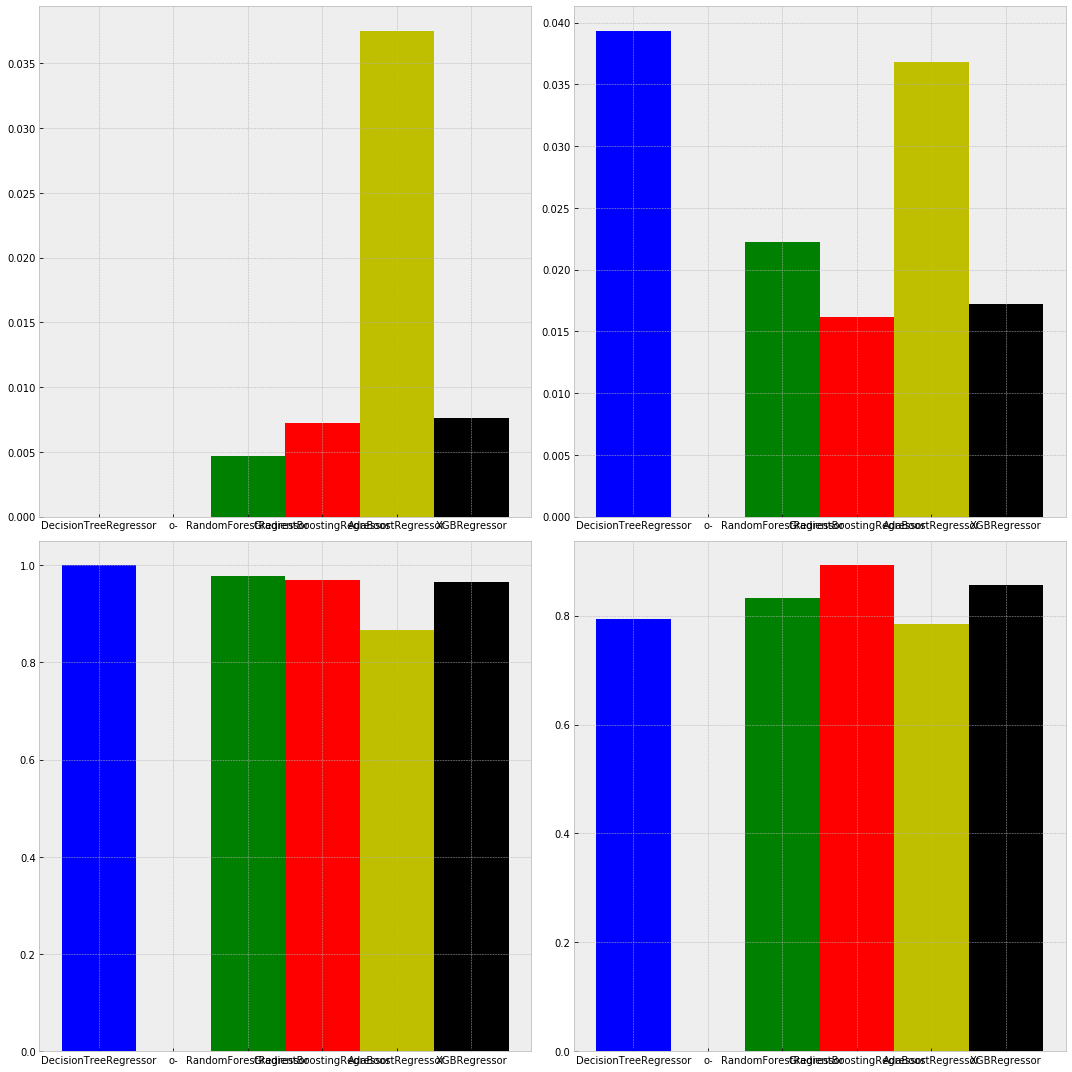

In [296]:
models = [DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(),
            AdaBoostRegressor(), XGBRegressor()]
samples_100 = len(X_train)
samples_10 = int(samples_100 * (0.1))
samples_1 = int(samples_10 * (0.1))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
results_dict = {}
colors = ['b','g','r', 'y', 'k', 'c', 'm', 'orange']
for model in models:
    print("===========================================")
    for sample in [samples_100]:
        results = train_predict(model, sample, X_train, y_train, X_test, y_test)
        print(results)
        print("---------------------------------------")
    results_dict[model.__class__.__name__] = results
    print("===========================================")
for i, (key ,value) in enumerate(results_dict.items()):
    axes[0, 0].bar(key, value['msle_train'], 'o-', color=colors[i],
             label="Training score")
    axes[0, 1].bar(key, value['msle_test'], 'o-', color=colors[i],
             label="Training score")
    axes[1, 0].bar(key, value['r2_score_train'], 'o-', color=colors[i],
             label="Training score")
    axes[1, 1].bar(key, value['r2_score_test'], 'o-', color=colors[i],
             label="Training score")
fig.tight_layout()

In [297]:
clf = XGBRegressor()
clf.fit(df_train_s, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [300]:
y_pred = clf.predict(df_test_s)

In [301]:
submission = pd.DataFrame({
        "Id": df_test["Id"],
        "SalePrice": y_pred
    })

In [302]:
submission.to_csv('submission-2.csv', index=False)